In [2]:
import pandas as pd
weather_past = pd.read_csv("weather_eocs.csv", encoding='cp949')
weather_past = weather_past.iloc[:,1:]
weather_past.columns = ['일시','지부', '평균기온', '평균최고기온', '평균최저기온', '평균습도', '최소습도', '월합강수량',
'평균풍속', '최대풍속', '합계일조시간', '일조율', '최심적설', '평균지면온도']
weather_past = weather_past.iloc[:,[0,1,2,3,4,5,7,8,9,12,13]]
weather_past['년'] = weather_past['일시'].apply(lambda x: x[:4])
weather_past['월'] = weather_past['일시'].apply(lambda x: x[-2:])


weather_past

,일시,지부,평균기온,평균최고기온,평균최저기온,평균습도,월합강수량,평균풍속,최대풍속,최심적설,평균지면온도,년,월
0,2020-01,강원,0.728571,5.821429,-3.328571,66.857143,85.335714,1.578571,7.500000,0.064286,0.435714,2020,01
1,2020-01,경기,0.600000,6.060000,-3.860000,72.800000,70.280000,1.180000,7.100000,0.000000,0.500000,2020,01
2,2020-01,광주전남,4.664286,8.678571,1.214286,69.428571,80.128571,2.785714,11.814286,0.000000,4.578571,2020,01
3,2020-01,대구경북,2.846667,7.693333,-1.126667,66.400000,89.080000,2.140000,9.693333,0.666667,2.393333,2020,01
4,2020-01,대전충청,1.623077,6.823077,-2.561538,71.000000,67.800000,1.300000,8.346154,0.000000,2.038462,2020,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,2023-04,부산경남,14.081250,20.043750,8.268750,62.812500,86.681250,1.987500,8.387500,0.000000,16.718750,2023,04
396,2023-04,서울,13.800000,19.000000,8.800000,60.000000,96.900000,2.500000,9.300000,0.000000,15.800000,2023,04
397,2023-04,인천,11.666667,15.966667,7.500000,64.666667,77.433333,3.266667,11.000000,0.000000,14.200000,2023,04
398,2023-04,전북,12.990000,19.370000,6.620000,64.200000,54.580000,2.000000,9.000000,0.000000,15.540000,2023,04


In [3]:
weather_2023= pd.read_excel('df_cleaned.xlsx')

In [4]:
#2023년 과거날씨와 미래날씨 나눠서 과거날씨 테스트데이터로 사용
weather_2023.columns = ['세부지역', '년', '월', '일', '최저기온', '최고기온', '평균기온', '강수량', '도', '지부']
weather_2023['강수량'] = weather_2023['강수량'].apply(lambda x: str(x).replace('mm', ''))
weather_2023['강수량'] = weather_2023['강수량'].apply(lambda x: str(x).replace('-', '0'))
weather_2023 = weather_2023[weather_2023['년']==2023]
weather_2023.dropna(inplace=True)
weather_2023['최저기온'] = weather_2023['최저기온'].apply(lambda x: str(x)[:-1])
weather_2023['최고기온'] = weather_2023['최고기온'].apply(lambda x: str(x)[:-1])
weather_2023['평균기온'] = weather_2023['평균기온'].apply(lambda x: str(x)[:-1])
weather_2023['최저기온'] = weather_2023['최저기온'].apply(lambda x: float(x))
weather_2023['최고기온'] = weather_2023['최고기온'].apply(lambda x: float(x))
weather_2023['평균기온'] = weather_2023['평균기온'].apply(lambda x: float(x))
#2023년 데이터중 과거와 미래로 분리 :과거 test, 미래 유사도 ? 
weather_2023['dummy'] = weather_2023['강수량'].apply(lambda x: str(x)[-1:])
weather_2023_p = weather_2023.query( ' dummy != "%" ')
weather_2023_f = weather_2023.query( ' dummy == "%" ')
weather_2023_p = weather_2023_p.iloc[:,:-1]
weather_2023_f = weather_2023_f.iloc[:,:-1]

In [6]:
weather_2023_p
weather_2023_f

,세부지역,년,월,일,최저기온,최고기온,평균기온,강수량,도,지부
1238,강릉,2023,5,23,15.0,25.0,20.0,10%,강원도,강원
1239,강릉,2023,5,24,15.0,27.0,21.0,20%,강원도,강원
1240,강릉,2023,5,25,18.0,28.0,23.0,0%,강원도,강원
1241,강릉,2023,5,26,19.0,26.0,22.5,0%,강원도,강원
1242,강릉,2023,5,27,19.0,26.0,22.5,0%,강원도,강원
...,...,...,...,...,...,...,...,...,...,...
115414,흑산도,2023,12,27,3.5,7.2,5.4,0%,전라남도,광주전남
115415,흑산도,2023,12,28,3.4,7.3,5.4,0%,전라남도,광주전남
115416,흑산도,2023,12,29,3.3,7.2,5.3,0%,전라남도,광주전남
115417,흑산도,2023,12,30,2.7,7.1,4.9,0%,전라남도,광주전남


In [7]:
#eocs 굴착공사 합계
timedata=pd.read_csv('timedata.csv', encoding='cp949')
timedata

,Unnamed: 0,연월,지사,총 건수,상수,하수,가스,전기,통신,난방,기타1),병행2)
0,0,2020-01,강원,127.0,54.0,13.0,2.0,13.0,7.0,0.0,37.0,1.0
1,1,2020-01,경기,1161.0,323.0,184.0,113.0,115.0,40.0,40.0,332.0,14.0
2,2,2020-01,광주전남,1399.0,578.0,159.0,141.0,141.0,152.0,0.0,221.0,7.0
3,3,2020-01,대구경북,1208.0,458.0,190.0,83.0,182.0,51.0,15.0,215.0,14.0
4,4,2020-01,대전충청,1029.0,343.0,142.0,204.0,96.0,30.0,1.0,206.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,2023-04,부산경남,3877.0,1373.0,490.0,458.0,437.0,309.0,7.0,762.0,41.0
396,396,2023-04,서울,5432.0,1578.0,1585.0,253.0,434.0,272.0,57.0,1244.0,9.0
397,397,2023-04,인천,1141.0,423.0,175.0,94.0,149.0,113.0,8.0,176.0,3.0
398,398,2023-04,전북,609.0,212.0,119.0,60.0,47.0,32.0,0.0,115.0,24.0


In [43]:
weather_past_c = weather_past.iloc[:,2:10]
timedata_c = timedata.iloc[:,3]
c= pd.concat([weather_past_c,timedata_c],axis=1)
c[:3]

c= c.rename(columns={'총 건수': 'total', '평균기온': 'avgtemp'})

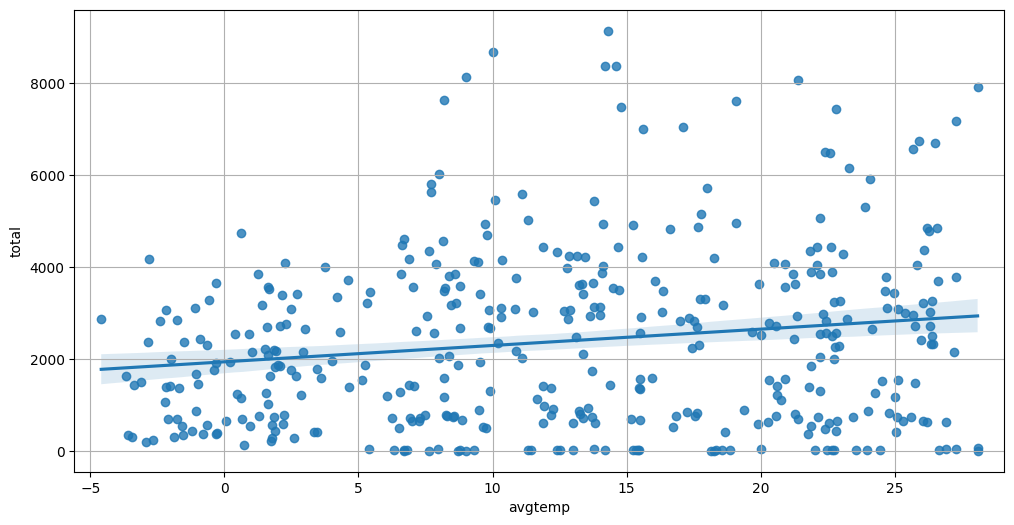

35.55254415134752 1940.5066597108155
1976.059203862163


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     11.45
Date:                Fri, 26 May 2023   Prob (F-statistic):           0.000787
Time:                        12:20:18   Log-Likelihood:                -3583.8
No. Observations:                 400   AIC:                             7172.
Df Residuals:                     398   BIC:                             7180.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1940.5067    163.364     11.878      0.000    1619.343    2261.670
avgtemp       35.5525     10.508      3.383      0.001      14.894      56.211
==============================================================================
Omnibus:                       41.796   Durbin-Watson:                   1.198
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               52.181
Skew:                           0.823   Prob(JB):                     4.67e-12
Kurtosis:                       3.651   Cond. No.                         27.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
 
#pyplot과 seaborn으로 회귀그래프 
plt.rcParams["figure.figsize"] = (12, 6)
sns.regplot(x='avgtemp', y='total', data=c)
plt.xlim(c['avgtemp'].min()-1, c['avgtemp'].max()+1)
plt.grid()
plt.show()
 
z=np.polyfit(c['avgtemp'], c['total'], 1) # 기울기와 절편 확인
f=np.poly1d(z) # f(x): f함수에 x값을 넣으면 y값을 계산해 줌
print(z[0], z[1])
print(f(1))

#statsmodel을 통해 회귀식의 회귀계수(기울기, 절편) 확인
ols('total ~ avgtemp', data=c).fit().summary()

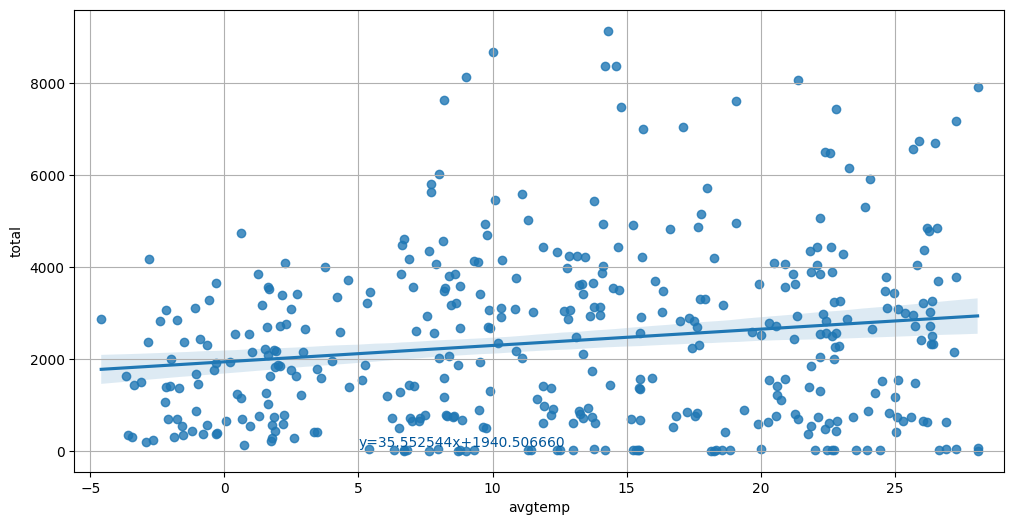

In [48]:
plt.rcParams['figure.figsize']=(12,6)
sns.regplot(x='avgtemp', y='total', data=c)
plt.xlim(c['avgtemp'].min()-1, c['avgtemp'].max()+1)
plt.text(5,100, 'y=%fx+%f' %(z[0],z[1]),color='#005599')
plt.grid()
plt.show()

In [29]:
#각 컬럼 표준화 -> 상관분석 보기전에 습도 강수량의 범위가 커서 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for i in c.columns:
    c[i] = scaler.fit_transform(c[[i]])
c.corr()

,평균기온,평균최고기온,평균최저기온,평균습도,월합강수량,평균풍속,최대풍속,최심적설,총 건수
평균기온,1.000000,0.992084,0.993989,0.722225,0.689310,-0.070484,-0.035680,-0.447186,0.167205
평균최고기온,0.992084,1.000000,0.973103,0.681107,0.650944,-0.153034,-0.104802,-0.475894,0.207883
평균최저기온,0.993989,0.973103,1.000000,0.759256,0.718008,-0.014276,0.012953,-0.417956,0.136145
평균습도,0.722225,0.681107,0.759256,1.000000,0.731504,-0.142566,0.028570,-0.261261,-0.103723
월합강수량,0.689310,0.650944,0.718008,0.731504,1.000000,-0.101747,0.049572,-0.222579,0.062700
평균풍속,-0.070484,-0.153034,-0.014276,-0.142566,-0.101747,1.000000,0.788598,0.196587,-0.297926
최대풍속,-0.035680,-0.104802,0.012953,0.028570,0.049572,0.788598,1.000000,0.130919,-0.398412
최심적설,-0.447186,-0.475894,-0.417956,-0.261261,-0.222579,0.196587,0.130919,1.000000,-0.100969
총 건수,0.167205,0.207883,0.136145,-0.103723,0.062700,-0.297926,-0.398412,-0.100969,1.000000


In [11]:
#각 컬럼 정규화 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

scalers = MinMaxScaler()
for i in c.columns:
    c[i] = scalers.fit_transform(c[[i]])
c.corr()



,평균기온,평균최고기온,평균최저기온,평균습도,월합강수량,평균풍속,최대풍속,최심적설,총 건수
평균기온,1.000000,0.992084,0.993989,0.722225,0.689310,-0.070484,-0.035680,-0.447186,0.167205
평균최고기온,0.992084,1.000000,0.973103,0.681107,0.650944,-0.153034,-0.104802,-0.475894,0.207883
평균최저기온,0.993989,0.973103,1.000000,0.759256,0.718008,-0.014276,0.012953,-0.417956,0.136145
평균습도,0.722225,0.681107,0.759256,1.000000,0.731504,-0.142566,0.028570,-0.261261,-0.103723
월합강수량,0.689310,0.650944,0.718008,0.731504,1.000000,-0.101747,0.049572,-0.222579,0.062700
평균풍속,-0.070484,-0.153034,-0.014276,-0.142566,-0.101747,1.000000,0.788598,0.196587,-0.297926
최대풍속,-0.035680,-0.104802,0.012953,0.028570,0.049572,0.788598,1.000000,0.130919,-0.398412
최심적설,-0.447186,-0.475894,-0.417956,-0.261261,-0.222579,0.196587,0.130919,1.000000,-0.100969
총 건수,0.167205,0.207883,0.136145,-0.103723,0.062700,-0.297926,-0.398412,-0.100969,1.000000


In [13]:
#로그변환 최고 짱짱맨 >< -> 기상요소 : 풍속 중요 
import numpy as np
for i in c.columns:
    c[i]=np.log1p(c[i])
c.corr()

C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


,평균기온,평균최고기온,평균최저기온,평균습도,월합강수량,평균풍속,최대풍속,최심적설,총 건수
평균기온,1.000000,0.928046,0.951230,0.537290,0.625153,-0.028177,-0.034473,-0.565363,-0.001807
평균최고기온,0.928046,1.000000,0.889875,0.572015,0.652406,-0.094208,-0.076482,-0.690411,0.068693
평균최저기온,0.951230,0.889875,1.000000,0.654693,0.530527,-0.059760,-0.115738,-0.306719,-0.068950
평균습도,0.537290,0.572015,0.654693,1.000000,0.748307,-0.165663,-0.002928,-0.327951,-0.137781
월합강수량,0.625153,0.652406,0.530527,0.748307,1.000000,-0.063553,0.086681,-0.354147,-0.057450
평균풍속,-0.028177,-0.094208,-0.059760,-0.165663,-0.063553,1.000000,0.811518,0.210292,-0.518171
최대풍속,-0.034473,-0.076482,-0.115738,-0.002928,0.086681,0.811518,1.000000,0.133541,-0.545446
최심적설,-0.565363,-0.690411,-0.306719,-0.327951,-0.354147,0.210292,0.133541,1.000000,-0.043352
총 건수,-0.001807,0.068693,-0.068950,-0.137781,-0.057450,-0.518171,-0.545446,-0.043352,1.000000


In [21]:
weather_past_c = weather_past.iloc[:,2:10]
timedata_c = timedata.iloc[:,3]
c= pd.concat([weather_past_c,timedata_c],axis=1)
c
#여름겨울 온도차 심한데 건수 낮아서 연평균으로 


,평균기온,평균최고기온,평균최저기온,평균습도,월합강수량,평균풍속,최대풍속,최심적설,총 건수
0,0.728571,5.821429,-3.328571,66.857143,85.335714,1.578571,7.500000,0.064286,127.0
1,0.600000,6.060000,-3.860000,72.800000,70.280000,1.180000,7.100000,0.000000,1161.0
2,4.664286,8.678571,1.214286,69.428571,80.128571,2.785714,11.814286,0.000000,1399.0
3,2.846667,7.693333,-1.126667,66.400000,89.080000,2.140000,9.693333,0.666667,1208.0
4,1.623077,6.823077,-2.561538,71.000000,67.800000,1.300000,8.346154,0.000000,1029.0
...,...,...,...,...,...,...,...,...,...
395,14.081250,20.043750,8.268750,62.812500,86.681250,1.987500,8.387500,0.000000,3877.0
396,13.800000,19.000000,8.800000,60.000000,96.900000,2.500000,9.300000,0.000000,5432.0
397,11.666667,15.966667,7.500000,64.666667,77.433333,3.266667,11.000000,0.000000,1141.0
398,12.990000,19.370000,6.620000,64.200000,54.580000,2.000000,9.000000,0.000000,609.0


In [20]:
c['평균기온'].mean()
c['평균최고기온'].mean()
c['평균최저기온'].mean()

8.174264777930402

In [22]:
c1= c.copy()

In [23]:
c1.corr(method='pearson')

,평균기온,평균최고기온,평균최저기온,평균습도,월합강수량,평균풍속,최대풍속,최심적설,총 건수
평균기온,1.000000,0.992084,0.993989,0.722225,0.689310,-0.070484,-0.035680,-0.447186,0.167205
평균최고기온,0.992084,1.000000,0.973103,0.681107,0.650944,-0.153034,-0.104802,-0.475894,0.207883
평균최저기온,0.993989,0.973103,1.000000,0.759256,0.718008,-0.014276,0.012953,-0.417956,0.136145
평균습도,0.722225,0.681107,0.759256,1.000000,0.731504,-0.142566,0.028570,-0.261261,-0.103723
월합강수량,0.689310,0.650944,0.718008,0.731504,1.000000,-0.101747,0.049572,-0.222579,0.062700
평균풍속,-0.070484,-0.153034,-0.014276,-0.142566,-0.101747,1.000000,0.788598,0.196587,-0.297926
최대풍속,-0.035680,-0.104802,0.012953,0.028570,0.049572,0.788598,1.000000,0.130919,-0.398412
최심적설,-0.447186,-0.475894,-0.417956,-0.261261,-0.222579,0.196587,0.130919,1.000000,-0.100969
총 건수,0.167205,0.207883,0.136145,-0.103723,0.062700,-0.297926,-0.398412,-0.100969,1.000000


In [26]:
x= c1['총 건수']
y=c1[['평균기온','평균최고기온','평균최저기온',
      '평균습도','월합강수량','평균풍속','최대풍속',	'최심적설']]

# 편차 계산
x_mean = np.mean(x)
y_mean = y.mean(axis=0)
deviation_x = x - x_mean
deviation_y = y - y_mean

# 편차의 제곱 계산
s_xx = np.sum(deviation_x**2)
s_yy = np.sum(deviation_y**2)
s_xy = np.sum(deviation_x * deviation_y)

# 상관계수 계산
r = s_xy / np.sqrt(s_xx * s_yy)

print("상관계수:", r)

상관계수: 0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
평균기온      0.0
평균습도      0.0
평균최고기온    0.0
평균최저기온    0.0
평균풍속      0.0
Length: 408, dtype: float64


In [50]:
# 결과의 p-value 가 5%를 벗어나기 때문에 non-stationary 데이터라고 볼 수 있다.
# AIC - 회귀에서 예측변수(predictor)를 고를 때 사용하며, 아카이케(Akaike)의 정보 기준(AIC; Akaike’s information Criterion)
# AIC 출처 : [8.6 추정과 차수 선택 | Forecasting: Principles and Practice](https://otexts.com/fppkr/arima-estimation.html)
from statsmodels.tsa.stattools import adfuller
# Perform Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
dftest = c(['total'], autolag='AIC')
dfoutput = pd.Series(
    dftest[0:4], 
    index=['Test Statistic',
           'p-value',
           '#Lags Used',
           'Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey Fuller Test:


TypeError: 'DataFrame' object is not callable

In [ ]:
#KPSS
